# **Diabetes Prediction Dataset**
Predict if the Diabetes are positive or negative

In [1]:
#Import the drive module from Google Colab to mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import the pandas library for data manipulation
import pandas as pd

#Read the CSV file from your Google Drive into a pandas DataFrame
dataset = pd.read_csv("/content/drive/MyDrive/diabetes_data_upload.csv")
print(dataset)

     Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0     40    Male       No        Yes                 No      Yes         No   
1     58    Male       No         No                 No      Yes         No   
2     41    Male      Yes         No                 No      Yes        Yes   
3     45    Male       No         No                Yes      Yes        Yes   
4     60    Male      Yes        Yes                Yes      Yes        Yes   
..   ...     ...      ...        ...                ...      ...        ...   
515   39  Female      Yes        Yes                Yes       No        Yes   
516   48  Female      Yes        Yes                Yes      Yes        Yes   
517   58  Female      Yes        Yes                Yes      Yes        Yes   
518   32  Female       No         No                 No      Yes         No   
519   42    Male       No         No                 No       No         No   

    Genital thrush visual blurring Itching Irritabi

# **Label Encoding Categorical Data**

In [3]:
#Import the LabelEncoder from scikit-learn to convert categorical data into numerical format
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()

#Convert all categorical columns to numerical format using LabelEncoder
dataset['Gender'] = Le.fit_transform(dataset['Gender'])
dataset['Polyuria'] = Le.fit_transform(dataset['Polyuria'])
dataset['Polydipsia'] = Le.fit_transform(dataset['Polydipsia'])
dataset['sudden weight loss'] = Le.fit_transform(dataset['sudden weight loss'])
dataset['weakness'] = Le.fit_transform(dataset['weakness'])
dataset['Polyphagia'] = Le.fit_transform(dataset['Polyphagia'])
dataset['Genital thrush'] = Le.fit_transform(dataset['Genital thrush'])
dataset['visual blurring'] = Le.fit_transform(dataset['visual blurring'])
dataset['Itching'] = Le.fit_transform(dataset['Itching'])
dataset['Irritability'] = Le.fit_transform(dataset['Irritability'])
dataset['delayed healing'] = Le.fit_transform(dataset['delayed healing'])
dataset['partial paresis'] = Le.fit_transform(dataset['partial paresis'])
dataset['muscle stiffness'] = Le.fit_transform(dataset['muscle stiffness'])
dataset['Alopecia'] = Le.fit_transform(dataset['Alopecia'])
dataset['Obesity'] = Le.fit_transform(dataset['Obesity'])

# **Separating Target Variable and Features**

In [4]:
#Separate the target variable 'class' and the features
Y = dataset['class']
X = dataset.drop(['class'],axis=1)
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


# **Splitting and Normalization of data**

In [5]:
#Import necessary libraries for data preprocessing and model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#Encode the target variable 'class' into numerical format
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test= train_test_split(X.values,Y, test_size=0.2, random_state= 42)

#Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **K-Nearest Neighbour Classifier**

K-Nearest Neighbour Classifier Accuracy: 0.9134615384615384
K-Nearest Neighbour Classifier AUC Score: 0.9204011950490825
K-Nearest Neighbour Classifier Precision Score: 0.9696969696969697
K-Nearest Neighbour Classifier Recall Score: 0.9014084507042254
K-Nearest Neighbour Classifier F1 Score: 0.9343065693430657


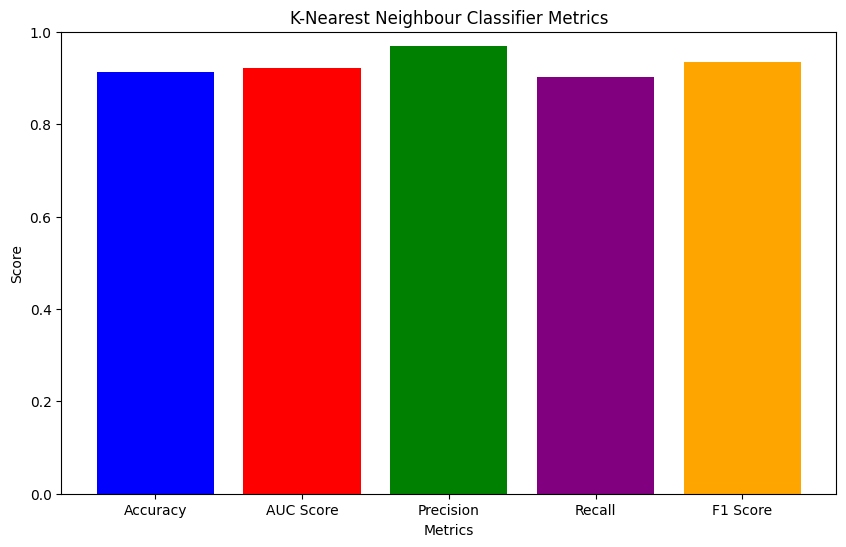

In [6]:
#Import necessary libraries for visualization and model training
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

#Create a KNN classifier with k=3 neighbors
classifier = KNeighborsClassifier(n_neighbors=3)

#Train the KNN classifier on the training data
classifier.fit(X_train_scaled, Y_train)

#Make predictions on the test data
y_pred = classifier.predict(X_test_scaled)

#Calculate the evaluation metrics for the KNN classifier
knn_accuracy = accuracy_score(Y_test, y_pred)
knn_auc_score = roc_auc_score(Y_test, y_pred)
knn_precision = precision_score(Y_test, y_pred)
knn_recall = recall_score(Y_test, y_pred)
knn_f1 = f1_score(Y_test, y_pred)

#Print the evaluation metrics for the KNN classifier
print(f"K-Nearest Neighbour Classifier Accuracy: {knn_accuracy}")
print(f"K-Nearest Neighbour Classifier AUC Score: {knn_auc_score}")
print(f"K-Nearest Neighbour Classifier Precision Score: {knn_precision}")
print(f"K-Nearest Neighbour Classifier Recall Score: {knn_recall}")
print(f"K-Nearest Neighbour Classifier F1 Score: {knn_f1}")

#Create a list of metric names
metrics = ['Accuracy', 'AUC Score', 'Precision', 'Recall', 'F1 Score']

#Create a list of corresponding metric values
#accuracy, auc_score, precision, recall, and f1 are already calculated
values = [knn_accuracy,knn_auc_score,knn_precision,knn_recall,knn_f1]

plt.figure(figsize=(10, 6))

#Create a bar plot with the metrics on the x-axis and their corresponding values on the y-axis
#Each bar is colored differently for better visualization
plt.bar(metrics, values, color=['blue', 'red', 'green', 'purple', 'orange'])

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('K-Nearest Neighbour Classifier Metrics')
#Set the y-axis limits between 0 and 1 to better visualize the scores
plt.ylim(0.0, 1.0)
plt.show()

# **Decision tree learning**

Decision Tree Accuracy: 0.9807692307692307
Decision Tree AUC Score: 0.9859154929577465
Decision Tree Precision Score: 0.9818681318681318
Decision Tree Recall Score: 0.971830985915493
Decision Tree F1 Score: 0.9857142857142858


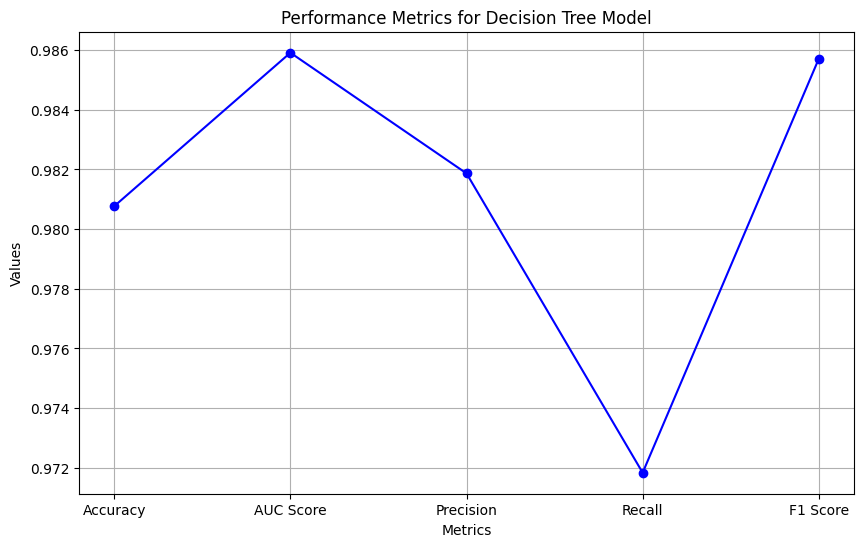

In [7]:
#Import the DecisionTreeClassifier from the sklearn.tree module
from sklearn import tree

#Create a Decision Tree Classifier with entropy as the criterion
Classifier = tree.DecisionTreeClassifier(criterion = 'entropy')

#Train the Decision Tree Classifier on the training data
Classifier = Classifier.fit(X_train_scaled, Y_train)

#Make predictions on the test data
y_pred = Classifier.predict(X_test_scaled)

#Calculate the evaluation metrics for the Decision Tree Classifier
DT_accuracy = accuracy_score(Y_test, y_pred)
DT_auc_score = roc_auc_score(Y_test, y_pred)
DT_precision = precision_score(Y_test, y_pred, average='weighted')
DT_recall = recall_score(Y_test, y_pred)
DT_f1 = f1_score(Y_test, y_pred)

#Print the evaluation metrics for the Decision Tree Classifier
print(f"Decision Tree Accuracy: {DT_accuracy}")
print(f"Decision Tree AUC Score: {DT_auc_score}")
print(f"Decision Tree Precision Score: {DT_precision}")
print(f"Decision Tree Recall Score: {DT_recall}")
print(f"Decision Tree F1 Score: {DT_f1}")

# Create a list of metric names
metrics = ['Accuracy', 'AUC Score', 'Precision', 'Recall', 'F1 Score']

# Create a list of corresponding metric values for the Decision Tree Classifier
values = [DT_accuracy, DT_auc_score, DT_precision, DT_recall, DT_f1]

plt.figure(figsize=(10, 6))

# Create a line plot with the metrics on the x-axis and their corresponding values on the y-axis
# Each point is marked with a circle and connected with a line
plt.plot(metrics, values, marker='o', color='b', linestyle='-')
plt.title('Performance Metrics for Decision Tree Model')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.grid(True)
plt.show()

[Text(0.6585365853658537, 0.9444444444444444, 'x[2] <= 0.5\nentropy = 0.972\nsamples = 416\nvalue = [167, 249]'),
 Text(0.3902439024390244, 0.8333333333333334, 'x[1] <= 0.5\nentropy = 0.85\nsamples = 214\nvalue = [155, 59]'),
 Text(0.15853658536585366, 0.7222222222222222, 'x[14] <= 0.5\nentropy = 0.911\nsamples = 49\nvalue = [16, 33]'),
 Text(0.0975609756097561, 0.6111111111111112, 'x[0] <= 0.25\nentropy = 0.581\nsamples = 36\nvalue = [5, 31]'),
 Text(0.04878048780487805, 0.5, 'x[13] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.024390243902439025, 0.3888888888888889, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.07317073170731707, 0.3888888888888889, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.14634146341463414, 0.5, 'x[10] <= 0.5\nentropy = 0.222\nsamples = 28\nvalue = [1, 27]'),
 Text(0.12195121951219512, 0.3888888888888889, 'entropy = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.17073170731707318, 0.3888888888888889, 'x[6] <= 0.5\nentropy = 0.65

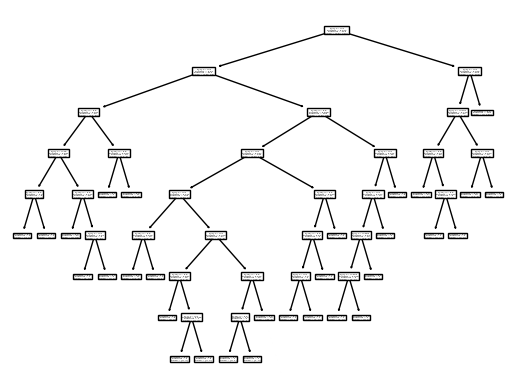

In [8]:
#Plot the Decision Tree using the plot_tree function from the sklearn.tree module
tree.plot_tree(Classifier)

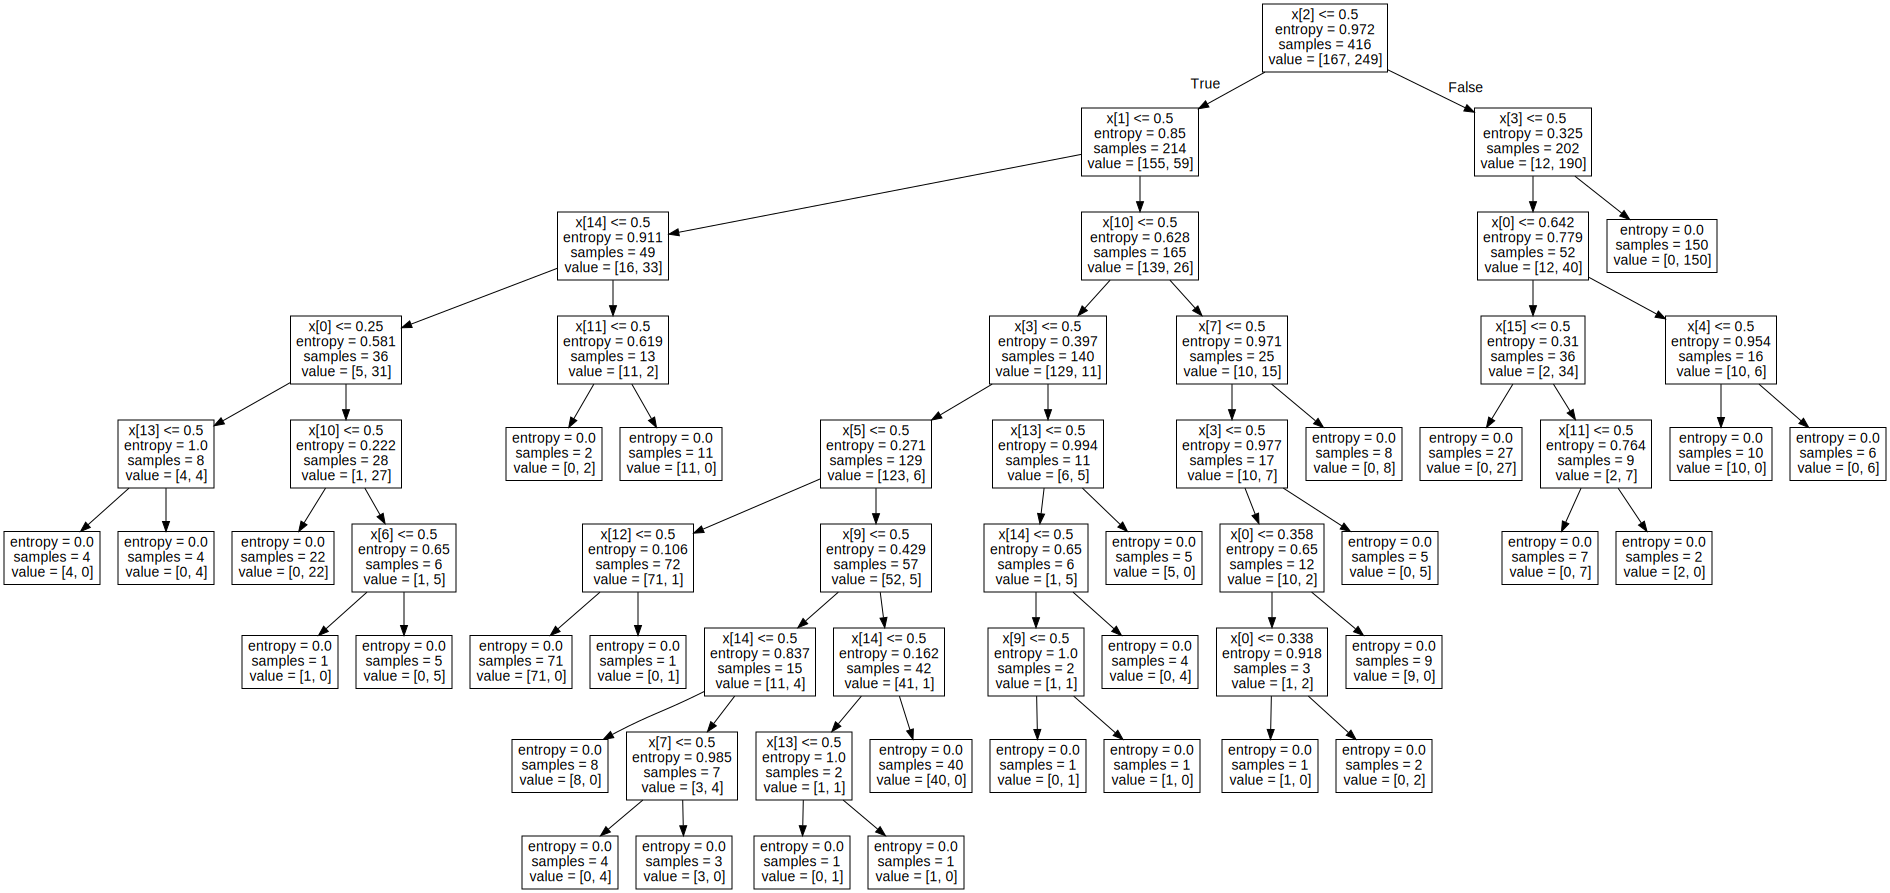

In [9]:
#Import the graphviz library for visualizing the Decision Tree
import graphviz

# Export the Decision Tree in the DOT format using the export_graphviz function
dot_data = tree.export_graphviz(Classifier, out_file=None)

#Create a graphviz Source object from the DOT data
graph = graphviz.Source(dot_data)
graph

# **Neural Network**

Epoch 1/30
11/11 [==============================] - 1s 26ms/step - loss: 0.6467 - accuracy: 0.7289 - val_loss: 0.5689 - val_accuracy: 0.8333
Epoch 2/30
11/11 [==============================] - 0s 7ms/step - loss: 0.5384 - accuracy: 0.8434 - val_loss: 0.4704 - val_accuracy: 0.8690
Epoch 3/30
11/11 [==============================] - 0s 7ms/step - loss: 0.4502 - accuracy: 0.8614 - val_loss: 0.3871 - val_accuracy: 0.8690
Epoch 4/30
11/11 [==============================] - 0s 8ms/step - loss: 0.3694 - accuracy: 0.9006 - val_loss: 0.3143 - val_accuracy: 0.8929
Epoch 5/30
11/11 [==============================] - 0s 6ms/step - loss: 0.3044 - accuracy: 0.9096 - val_loss: 0.2603 - val_accuracy: 0.9048
Epoch 6/30
11/11 [==============================] - 0s 5ms/step - loss: 0.2573 - accuracy: 0.9187 - val_loss: 0.2253 - val_accuracy: 0.9405
Epoch 7/30
11/11 [==============================] - 0s 5ms/step - loss: 0.2307 - accuracy: 0.9217 - val_loss: 0.2022 - val_accuracy: 0.9524
Epoch 8/30
11/11 [=

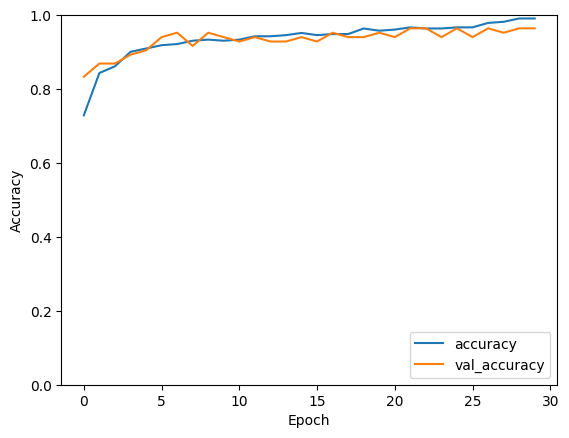

In [10]:
#Import the necessary libraries from TensorFlow and Keras
from tensorflow import keras
from keras import layers,models

#Create a sequential model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)), #Input layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'), #Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1, activation='sigmoid')  # Use 'sigmoid' activation for binary classification
])

#Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model with training data, validation split, and specified epochs and batch size
md =model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=30, batch_size=32)

#Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

#Make predictions on the test data
y_pred = model.predict(X_test_scaled)

#Convert probabilities to binary predictions (0 or 1)
y_pred_pre = (model.predict(X_test_scaled) > 0.5).astype("int32")

#Print the evaluation metrics for the Neural Network
print(f"Neural Network Accuracy: {accuracy}")
print(f"Neural Network AUC Score: {roc_auc_score(Y_test, y_pred)}")
print(f"Neural Network Precision Score: {precision_score(Y_test, y_pred_pre)}")
print(f"Neural Network Recall Score: {recall_score(Y_test, y_pred_pre)}")
print(f"Neural Network F1 Score: {f1_score(Y_test, y_pred_pre)}")

#Plot the training and validation accuracy over epochs
plt.plot(md.history['accuracy'], label='accuracy')
plt.plot(md.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# **Support vector machine**

Support vector machine Accuracy: 0.9134615384615384
Support vector machine AUC Score: 0.8960734101579173
Support vector machine Precision Score: 0.9305555555555556
Support vector machine Recall Score: 0.9436619718309859
Support vector machine F1 Score: 0.9370629370629372


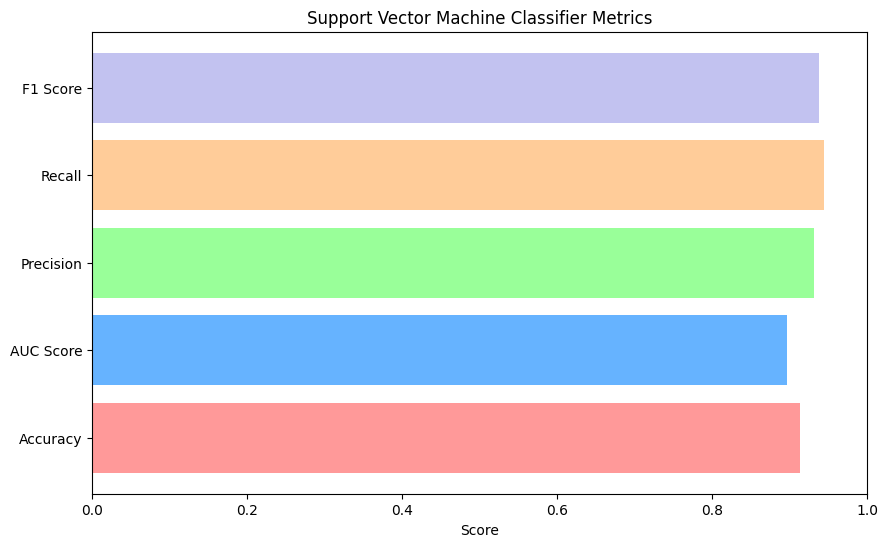

In [11]:
#Import the SVC (Support Vector Classifier) class from sklearn.svm
from sklearn.svm import SVC

#Create an SVC model with a linear kernel, C=1.0
svm_model = SVC(kernel='linear', C=1.0)

#Train the SVC model on the training data
svm_model.fit(X_train_scaled, Y_train)

#Make predictions on the test data
y_pred = svm_model.predict(X_test_scaled)

#Calculate the evaluation metrics for the SVC model
SVC_accuracy = accuracy_score(Y_test, y_pred)
SVC_auc_score = roc_auc_score(Y_test, y_pred)
SVC_precision = precision_score(Y_test, y_pred)
SVC_recall = recall_score(Y_test, y_pred)
SVC_f1 = f1_score(Y_test, y_pred)

#Print the evaluation metrics for the SVC model
print(f"Support vector machine Accuracy: {SVC_accuracy}")
print(f"Support vector machine AUC Score: {SVC_auc_score}")
print(f"Support vector machine Precision Score: {SVC_precision}")
print(f"Support vector machine Recall Score: {SVC_recall}")
print(f"Support vector machine F1 Score: {SVC_f1}")

#Create a list of metric names
metrics = ['Accuracy', 'AUC Score', 'Precision', 'Recall', 'F1 Score']

#Create a list of corresponding metric values for the SVC model
values = [SVC_accuracy, SVC_auc_score, SVC_precision, SVC_recall, SVC_f1]

plt.figure(figsize=(10, 6))

# Create a horizontal bar plot with the metrics on the y-axis and their corresponding values on the x-axis
# Each bar is colored differently for better visualization
plt.barh(metrics, values, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.xlabel('Score')
plt.title('Support Vector Machine Classifier Metrics')
plt.xlim(0.0, 1.0)  # Set x-axis limits between 0 and 1
plt.show()